In [24]:
print(data.columns)


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [25]:
# Group by CustomerID to calculate total spending and transaction count
customer_data = data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count')
).reset_index()

# Display the first few rows of the aggregated data
print(customer_data.head())


  CustomerID  total_spending  total_transactions
0      C0001         3354.52                   5
1      C0002         1862.74                   4
2      C0003         2725.38                   4
3      C0004         5354.88                   8
4      C0005         2034.24                   3


In [26]:
# Merge with customer profile data (CustomerName, Region, etc.)
customer_profile_data = data[['CustomerID', 'Region']].drop_duplicates()
merged_data = pd.merge(customer_data, customer_profile_data, on='CustomerID', how='inner')

# Display the first few rows of the merged data
print(merged_data.head())


  CustomerID  total_spending  total_transactions         Region
0      C0001         3354.52                   5  South America
1      C0002         1862.74                   4           Asia
2      C0003         2725.38                   4  South America
3      C0004         5354.88                   8  South America
4      C0005         2034.24                   3           Asia


In [27]:
# If using Region as a feature, we can encode it as numerical values
merged_data = pd.get_dummies(merged_data, columns=['Region'], drop_first=True)

# Select relevant features for clustering
customer_features = merged_data[['total_spending', 'total_transactions'] + [col for col in merged_data if 'Region' in col]]

# Display the selected features
print(customer_features.head())


   total_spending  total_transactions  Region_Europe  Region_North America  \
0         3354.52                   5          False                 False   
1         1862.74                   4          False                 False   
2         2725.38                   4          False                 False   
3         5354.88                   8          False                 False   
4         2034.24                   3          False                 False   

   Region_South America  
0                  True  
1                 False  
2                  True  
3                  True  
4                 False  


Davies-Bouldin Index: 0.5494981347648291


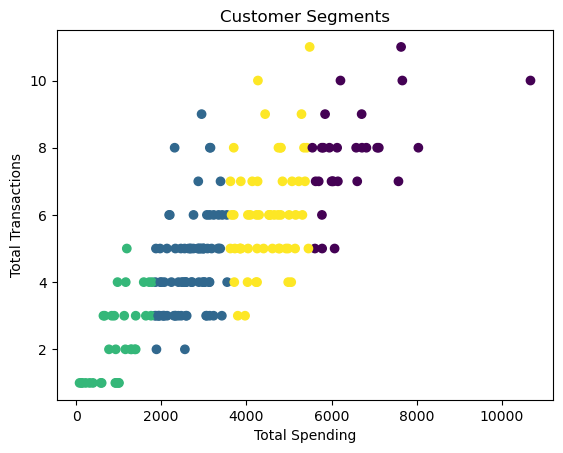

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(customer_features)

# Evaluate the clusters using the Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features, merged_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualize the clusters (for 2D or 3D visualization)
import matplotlib.pyplot as plt

plt.scatter(merged_data['total_spending'], merged_data['total_transactions'], c=merged_data['Cluster'], cmap='viridis')
plt.xlabel('Total Spending')
plt.ylabel('Total Transactions')
plt.title('Customer Segments')
plt.show()
